### import

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
import numpy as np

### 전역 변수

In [1]:
file_path = 'mealkit_reviews_top20_emart.csv'

### 데이터프레임 생성

In [8]:
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')

    # 데이터프레임 출력 (선택 사항)
    print(df.head())  # 처음 5행 출력

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

   rating                                            content        date  \
0       5                   진짜 넘 맛있어요 떡이랑 팽이버섯 츄가해서 푸짐히 먹었어요  2024.10.09   
1       5  추천템이기도 하고 원래 동네에서 사먹던 밀키트와 가격대도 \n비슷한데 좀더 퀄러티가...  2024.11.27   
2       5        정해진시간에 잘 받았습니다 \n유통기한도 23,24일 괜찮게\n주셨네요\n굳굿  2025.01.20   
3       5                      자주 품절이라 구매못했는데 오늘은 운 좋게 구매했어요  2025.01.20   
4       5                               품절이 잘되는 부대찌개 아주 맛있어요  2025.01.19   

      product_id      product_name  rank  
0  1000604385774  송탄식 부대찌개 1.538kg     1  
1  1000604385774  송탄식 부대찌개 1.538kg     1  
2  1000604385774  송탄식 부대찌개 1.538kg     1  
3  1000604385774  송탄식 부대찌개 1.538kg     1  
4  1000604385774  송탄식 부대찌개 1.538kg     1  


In [9]:
df

,rating,content,date,product_id,product_name,rank
0,5,진짜 넘 맛있어요 떡이랑 팽이버섯 츄가해서 푸짐히 먹었어요,2024.10.09,1000604385774,송탄식 부대찌개 1.538kg,1
1,5,추천템이기도 하고 원래 동네에서 사먹던 밀키트와 가격대도 \n비슷한데 좀더 퀄러티가...,2024.11.27,1000604385774,송탄식 부대찌개 1.538kg,1
2,5,"정해진시간에 잘 받았습니다 \n유통기한도 23,24일 괜찮게\n주셨네요\n굳굿",2025.01.20,1000604385774,송탄식 부대찌개 1.538kg,1
3,5,자주 품절이라 구매못했는데 오늘은 운 좋게 구매했어요,2025.01.20,1000604385774,송탄식 부대찌개 1.538kg,1
4,5,품절이 잘되는 부대찌개 아주 맛있어요,2025.01.19,1000604385774,송탄식 부대찌개 1.538kg,1
...,...,...,...,...,...,...
22067,5,빠른 배송 고맙습니다. 양도 많고 가격도 저렴했어요,2025.01.11,1000634007730,영월식 청국장 930g,20
22068,5,알차요 맛있어요 맛있어요~~,2025.01.07,1000634007730,영월식 청국장 930g,20
22069,5,쓱배송으로 편리하게 주문하는 제품들입니다. 아주 좋아요^^,2025.01.02,1000634007730,영월식 청국장 930g,20
22070,5,맛있어서 주문합니다. 매운 고추 하나 추가하면 좋아요,2024.12.31,1000634007730,영월식 청국장 930g,20


### 리뷰 길이 시각화

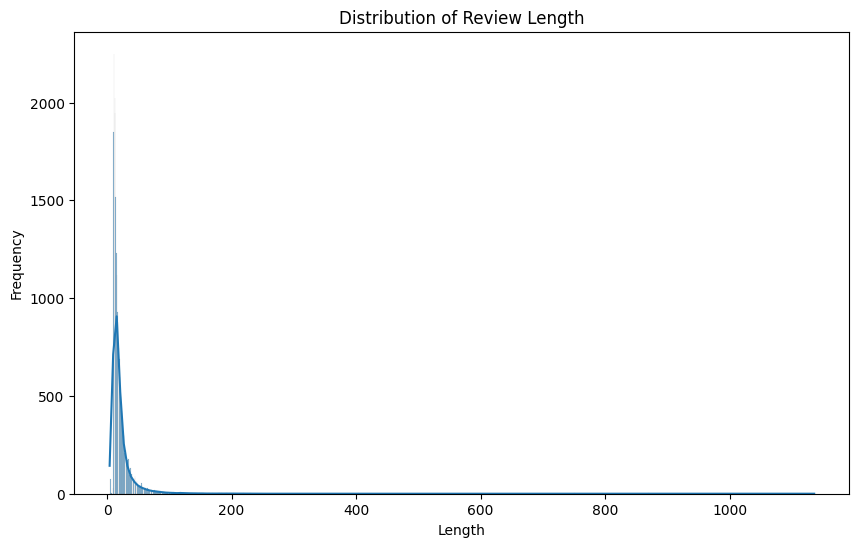

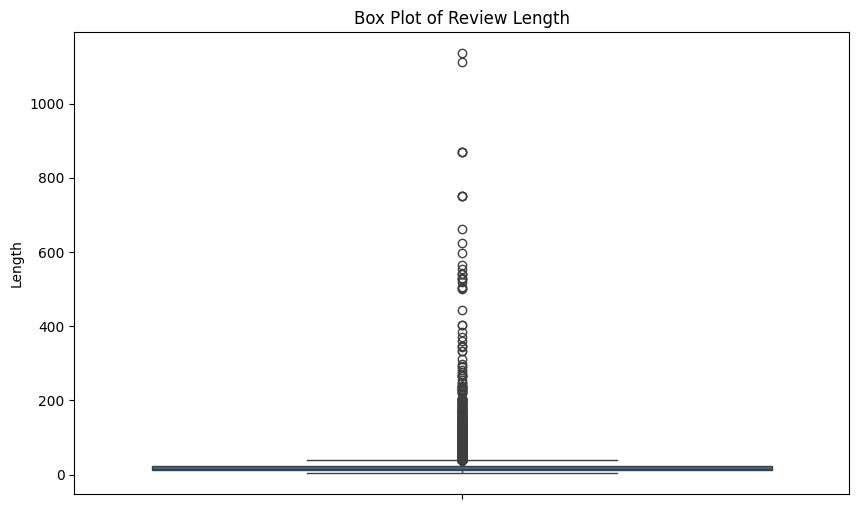

In [14]:
df['content_length'] = df['content'].str.len()

# 길이 분포 시각화 (히스토그램)
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# 길이 분포 시각화 (박스 플롯)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['content_length'])
plt.title('Box Plot of Review Length')
plt.ylabel('Length')
plt.show()

### TF-IDF로 5개의 주제로 NMF로 토픽모델링, 각 토픽별 주요 키워드와 가중치 20개씩 추출

In [17]:
# prompt: df['content'] 를 TF-IDF로 5개의 주제로 NMF로 토픽모델링을 하고 각 토픽별 주요 키워드와 가중치 20개씩 추출

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000) #  max_features 조절 가능
tfidf = vectorizer.fit_transform(df['content'])

# NMF 모델 학습 (5개 주제)
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf)

# 각 토픽별 주요 키워드와 가중치 추출
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx + 1}:")
    top_keywords_idx = topic.argsort()[:-21:-1] # 상위 20개 키워드
    top_keywords = [(feature_names[i], topic[i]) for i in top_keywords_idx]
    for keyword, weight in top_keywords:
        print(f"  - {keyword}: {weight:.3f}")
    print()

Topic #1:
  - 좋아요: 5.740
  - 간편하게: 0.343
  - 빠르고: 0.311
  - 먹기: 0.297
  - 아주: 0.225
  - 맛도: 0.215
  - 배송도: 0.208
  - 만족합니다: 0.161
  - 배송: 0.152
  - 간단하게: 0.139
  - 간편하고: 0.139
  - ㅎㅎ: 0.139
  - 너무: 0.138
  - 맛있고: 0.134
  - 있어서: 0.128
  - 편하고: 0.116
  - 간편해서: 0.096
  - 한끼: 0.090
  - 받았습니다: 0.085
  - 편하게: 0.080

Topic #2:
  - 맛있어요: 4.782
  - 간편하고: 0.337
  - 너무: 0.287
  - 신선하고: 0.144
  - 양도: 0.136
  - 많고: 0.126
  - 추천합니다: 0.111
  - ㅎㅎ: 0.107
  - 순두부찌개: 0.102
  - 순두부: 0.102
  - 피코크: 0.097
  - 진짜: 0.092
  - 만족합니다: 0.086
  - 정말: 0.086
  - 재구매: 0.073
  - 밀키트: 0.070
  - 구매해요: 0.067
  - 쉽고: 0.060
  - 얼큰하고: 0.060
  - 생각보다: 0.059

Topic #3:
  - 맛있게: 3.546
  - 먹었습니다: 1.963
  - 먹었어요: 1.783
  - 너무: 0.244
  - 잘먹었습니다: 0.241
  - 먹고: 0.194
  - 간편하게: 0.165
  - 순두부찌개: 0.135
  - 있습니다: 0.132
  - 잘먹었어요: 0.119
  - 정말: 0.105
  - 한끼: 0.100
  - 있어요: 0.098
  - 추가해서: 0.082
  - 맛나게: 0.078
  - 저렴하게: 0.068
  - 아주: 0.067
  - 편하게: 0.060
  - 먹었네요: 0.058
  - ㅎㅎ: 0.057

Topic #4:
  - 자주: 2.725
  - 구매하는: 2.201
  - 제품입니다: 1

In [18]:
# Sum TF-IDF scores for each word across all documents
tfidf_sums = tfidf.sum(axis=0)

# Convert to a list of (word, score) tuples
word_scores = [(word, tfidf_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort by score in descending order
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Get top 50 keywords
top_50_keywords = sorted_word_scores[:50]

# Print or further process the top 50 keywords
print("Top 50 keywords by TF-IDF sum:")
for word, score in top_50_keywords:
    print(f"- {word}: {score:.3f}")

Top 50 keywords by TF-IDF sum:
- 좋아요: 1447.482
- 맛있어요: 1212.698
- 자주: 540.469
- 맛있게: 485.068
- 항상: 412.579
- 감사합니다: 392.741
- 너무: 379.453
- 구매하는: 313.785
- 먹었어요: 310.221
- 만족합니다: 286.956
- 간편하게: 278.430
- 제품입니다: 274.330
- 먹었습니다: 271.107
- 간편하고: 245.694
- 배송: 241.021
- 맛있어서: 233.750
- 받았습니다: 221.041
- 좋습니다: 220.958
- 맛도: 215.941
- 있어요: 207.961
- 상품입니다: 206.734
- 빠르고: 199.313
- 저렴하게: 198.367
- 순두부찌개: 192.586
- 먹기: 189.518
- 아주: 177.410
- 맛있습니다: 177.267
- ㅎㅎ: 174.900
- 순두부: 174.856
- 잘받았습니다: 167.898
- 좋네요: 167.712
- 맛있네요: 164.715
- 맛이: 161.666
- 밀키트: 160.373
- 배송도: 159.407
- 피코크: 155.333
- 생각보다: 152.581
- 맛있고: 152.273
- 양도: 148.597
- 정말: 145.671
- 같아요: 145.325
- 맛은: 144.154
- 괜찮아요: 141.495
- 좋은: 140.182
- 구매합니다: 139.949
- 있어서: 137.878
- 추천합니다: 135.931
- 신선하고: 134.680
- 제품: 133.826
- 한끼: 131.886


In [19]:
df.shape

(22072, 6)

### 유사도 분석, 상위 100개 문서 heatmap 시각화

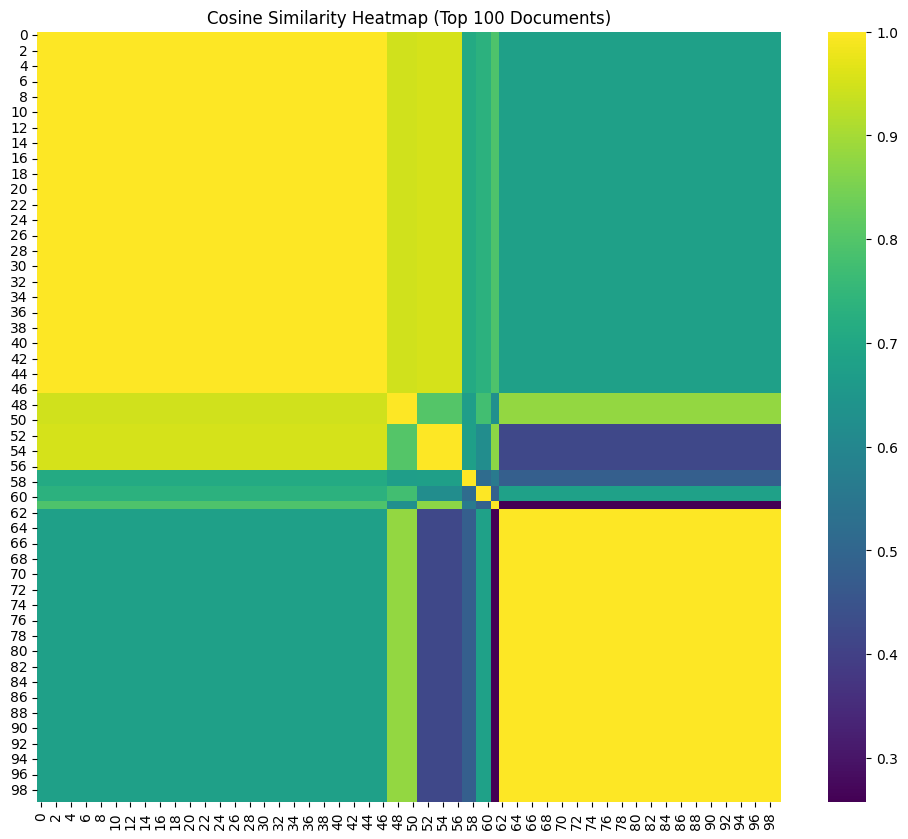

In [22]:
# prompt : 유사도 분석을 하고 heatmap 으로 상위 100개 문서만 시각화

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(df['content'])

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix)

# 상위 100개 문서 선택 (인덱스 기반)
top_n = 100
top_indices = np.argsort(cosine_similarities.sum(axis=0))[::-1][:top_n]


# 상위 100개 문서의 유사도 행렬 생성
similarity_matrix_top100 = cosine_similarities[top_indices,:][:,top_indices]

# Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix_top100, cmap='viridis', annot=False) # annot=False to remove annotations
plt.title('Cosine Similarity Heatmap (Top 100 Documents)')
plt.show()

In [25]:
# prompt: 위에서 구한 유사도를 바탕으로 랜덤하게 5개 문서를 가져와서 각 문서와 유사도가 높은 문서 5개씩 유사도, content 출력

import random

# Assuming 'cosine_similarities' and 'df' are defined from the previous code

# Randomly select 5 documents
random_indices = random.sample(range(len(df)), 5)

for idx in random_indices:
    # Get cosine similarities for the current document
    similarities = cosine_similarities[idx]

    # Get top 5 similar documents (excluding itself)
    top_5_similar = np.argsort(similarities)[::-1][1:6]  # Exclude itself (index 0)

    print(f"\nDocument {idx}:")
    print(f"Content: {df['content'][idx]}")

    for similar_idx in top_5_similar:
        print(f"  - Similar Document {similar_idx}: Similarity = {similarities[similar_idx]:.4f}, Content = {df['content'][similar_idx]}")


Document 12436:
Content: 양도 많고 조리도 편하고 맛도 좋았어요
  - Similar Document 12436: Similarity = 1.0000, Content = 양도 많고 조리도 편하고 맛도 좋았어요
  - Similar Document 16396: Similarity = 0.6191, Content = 양도 많고 맛도 좋아요
  - Similar Document 3583: Similarity = 0.6191, Content = 양도 많고 맛도 좋아요
  - Similar Document 15910: Similarity = 0.6191, Content = 양도 많고 맛도 좋아요
  - Similar Document 5133: Similarity = 0.6131, Content = 조리도 편하고 양도 많아요

Document 5292:
Content: 맛있어요 이건 두고두고 먹어요 가성비도 좋음요
  - Similar Document 3515: Similarity = 0.7504, Content = 이건 좀…. 아쉽다
  - Similar Document 15016: Similarity = 0.6609, Content = 맛있어요. 아기가 잘 먹어요.
  - Similar Document 13666: Similarity = 0.6609, Content = 맛있어요. 아기가 잘 먹어요.
  - Similar Document 18206: Similarity = 0.6609, Content = 자주구매해서 먹어요 맛있어요
  - Similar Document 13282: Similarity = 0.6609, Content = 맛있어요. 아기가 잘 먹어요.

Document 4510:
Content: 맛있습니다 좋습니다
  - Similar Document 21159: Similarity = 1.0000, Content = 맛있습니다  안주로 좋습니다
  - Similar Document 4510: Similarity = 1.0000, C

### 5개로 군집화 하고 마지막 컬럼에 군집값을 넣어주고 각 군집별로 상위 키워드 20개와 가중치 출력

In [26]:
# prompt: df['content'] 를 통해 5개로 군집화 하고 마지막 컬럼에 군집값을 넣어주고 각 군집별로 상위 키워드 20개와 가중치 출력, 각 군집에 할당 된 데이터 수도 함께 표시

from sklearn.cluster import KMeans

# KMeans를 사용하여 5개의 군집으로 데이터를 군집화
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf)

# 각 군집별 상위 키워드와 가중치 출력
for cluster_num in range(5):
    print(f"\nCluster {cluster_num}:")
    cluster_data = df[df['cluster'] == cluster_num]
    print(f"  Number of data points: {len(cluster_data)}")

    # 군집 내 문서의 TF-IDF 합 계산
    cluster_tfidf = tfidf[df['cluster'] == cluster_num]
    cluster_tfidf_sums = cluster_tfidf.sum(axis=0)

    # 상위 20개 키워드 추출
    word_scores = [(word, cluster_tfidf_sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)
    top_keywords = sorted_word_scores[:20]

    # 키워드와 가중치 출력
    for word, score in top_keywords:
        print(f"  - {word}: {score:.3f}")


Cluster 0:
  Number of data points: 554
  - 간편하게: 270.459
  - 좋아요: 67.682
  - 먹기: 58.088
  - 있어서: 38.010
  - 먹을수: 26.685
  - 먹을: 24.236
  - 있어: 19.923
  - 좋네요: 16.494
  - 집에서: 16.086
  - 한끼: 15.268
  - 해먹기: 13.617
  - 맛있어요: 13.191
  - 먹었어요: 12.072
  - 있어요: 10.202
  - 맛있게: 9.311
  - 순두부: 8.941
  - 샤브샤브: 8.578
  - 순두부찌개: 8.037
  - 맛도: 7.982
  - 좋고: 7.856

Cluster 1:
  Number of data points: 18159
  - 좋아요: 1267.417
  - 자주: 469.650
  - 맛있게: 457.844
  - 항상: 376.880
  - 감사합니다: 372.953
  - 구매하는: 304.393
  - 너무: 291.343
  - 먹었어요: 275.236
  - 만족합니다: 257.683
  - 제품입니다: 257.629
  - 먹었습니다: 252.062
  - 맛있어서: 231.824
  - 배송: 227.614
  - 받았습니다: 214.633
  - 좋습니다: 201.781
  - 맛도: 200.864
  - 상품입니다: 196.416
  - 빠르고: 181.793
  - 있어요: 180.426
  - 맛있습니다: 167.777

Cluster 2:
  Number of data points: 523
  - 조금: 98.215
  - 고기: 58.522
  - 있는: 55.626
  - 집에: 41.275
  - 맛있어요: 12.541
  - 양이: 11.696
  - 넣고: 11.420
  - 추가해서: 11.051
  - 먹었어요: 10.349
  - 따로: 10.337
  - 맛있게: 10.096
  - 너무: 9.953
  - 야채: 9.082
  - 먹으

### 각 군집별 빈도수 시각화

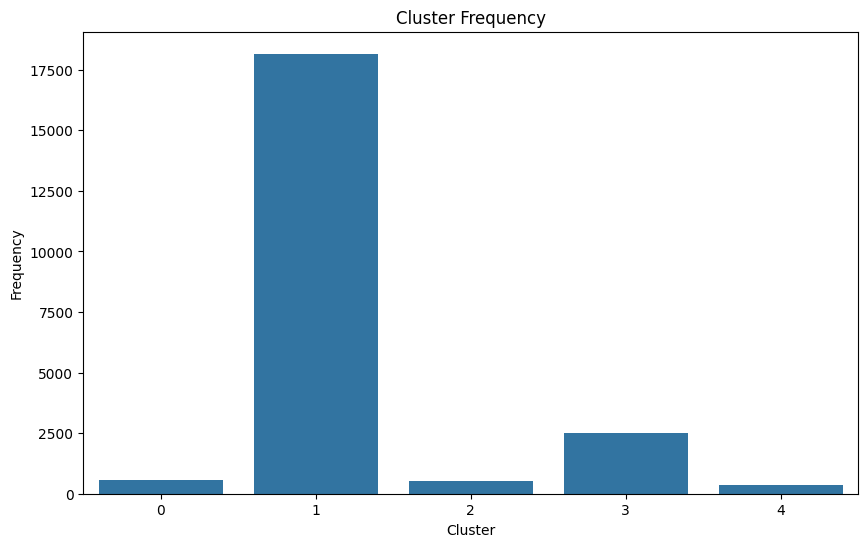

In [27]:
# prompt: 각 군집별 빈도수 시각화

# 군집별 빈도수 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()

In [29]:
# prompt: 1번 군집 데이터만 가져오기

# 군집 번호 지정 (예: 1번 군집)
cluster_number = 1

# 지정된 군집 데이터만 추출
cluster_data = df[df['cluster'] == cluster_number]

# 추출된 데이터 출력 또는 추가 분석
cluster_data

,rating,content,date,product_id,product_name,rank,cluster
2,5,"정해진시간에 잘 받았습니다 \n유통기한도 23,24일 괜찮게\n주셨네요\n굳굿",2025.01.20,1000604385774,송탄식 부대찌개 1.538kg,1,1
3,5,자주 품절이라 구매못했는데 오늘은 운 좋게 구매했어요,2025.01.20,1000604385774,송탄식 부대찌개 1.538kg,1,1
5,5,편하게 받아 볼 수 있어서 좋아요.,2025.01.11,1000604385774,송탄식 부대찌개 1.538kg,1,1
6,5,구성도 괜찮고 맛도 나쁘지않아요.,2025.01.10,1000604385774,송탄식 부대찌개 1.538kg,1,1
7,5,편하고 너무 좋아요 ㄱ굿,2025.01.09,1000604385774,송탄식 부대찌개 1.538kg,1,1
...,...,...,...,...,...,...,...
22066,5,주기적으로 쓱배송으로 주문해서 편리하게 애용하는 제품입니다,2025.01.16,1000634007730,영월식 청국장 930g,20,1
22067,5,빠른 배송 고맙습니다. 양도 많고 가격도 저렴했어요,2025.01.11,1000634007730,영월식 청국장 930g,20,1
22069,5,쓱배송으로 편리하게 주문하는 제품들입니다. 아주 좋아요^^,2025.01.02,1000634007730,영월식 청국장 930g,20,1
22070,5,맛있어서 주문합니다. 매운 고추 하나 추가하면 좋아요,2024.12.31,1000634007730,영월식 청국장 930g,20,1


# 보고서
* prompt : 아래는 밀키드 상품 판매량 top20의 리뷰 에 대한 군집화와 상위 키워드 20개와 가중치 이다. 이에 대한 보고서 작성

## 보고서 내용
### 밀키트 상품 판매량 Top 20 리뷰 데이터 군집화 분석 보고서

---

#### **1. 분석 개요**
본 보고서는 밀키트 상품 판매량 상위 20개 제품에 대한 리뷰 데이터를 군집화하여 주요 소비자 반응과 키워드를 분석한 결과를 정리한 것입니다. 각 군집은 소비자들의 리뷰에서 나타난 공통적인 주제 및 키워드에 따라 그룹화되었으며, 각 군집의 주요 키워드와 가중치를 기반으로 소비자들의 구매 동기, 만족도, 개선 요구사항 등을 파악하고자 합니다.

---

#### **2. 군집화 결과 요약**

총 5개의 군집으로 나뉘며, 각 군집은 리뷰 데이터 포인트 수, 주요 키워드, 그리고 키워드의 가중치로 구성됩니다. 아래는 각 군집의 특징을 요약한 내용입니다.

---

### **Cluster 0: 간편성과 실용성 강조**
- **데이터 포인트 수**: 554
- **주요 키워드**: "간편하게", "좋아요", "먹기", "있어서", "먹을수", "집에서", "한끼", "해먹기"
- **특징**:
  - 이 군집에서는 밀키트의 **간편함**과 **실용성**이 주요 주제입니다.
  - "간편하게"가 가장 높은 가중치를 가지며, 밀키트를 이용해 집에서 간단히 한 끼를 해결하는 점에 대한 긍정적인 반응이 많습니다.
  - "순두부", "샤브샤브" 등 특정 메뉴에 대한 언급도 눈에 띕니다.

---

### **Cluster 1: 전반적인 만족과 재구매 의사**
- **데이터 포인트 수**: 18,159
- **주요 키워드**: "좋아요", "자주", "맛있게", "항상", "감사합니다", "구매하는", "너무", "만족합니다", "배송", "빠르고"
- **특징**:
  - 리뷰 데이터의 대부분을 차지하는 군집으로, **전반적인 만족도**가 높은 소비자들의 리뷰가 포함되어 있습니다.
  - "좋아요"와 "감사합니다" 같은 긍정적인 표현이 두드러지며, **재구매 의사**를 나타내는 "자주", "항상" 등의 키워드가 포함되어 있습니다.
  - 배송 관련 키워드("배송", "빠르고")도 포함되어 있어, **배송 서비스**에 대한 만족도가 높음을 알 수 있습니다.

---

### **Cluster 2: 추가 재료 활용과 양에 대한 언급**
- **데이터 포인트 수**: 523
- **주요 키워드**: "조금", "고기", "있는", "집에", "양이", "추가해서", "야채", "따로", "넣고"
- **특징**:
  - 이 군집은 밀키트를 기본으로 하여 **추가적인 재료를 활용**하거나, **양**에 대한 의견을 주로 다룹니다.
  - "조금", "양이", "추가해서" 등의 키워드로 보아, 일부 소비자는 밀키트의 양이 부족하다고 느끼거나, 추가 재료를 활용해 요리를 완성하고 있음을 알 수 있습니다.
  - "야채", "고기" 등의 키워드는 밀키트의 구성품에 대한 구체적인 피드백을 나타냅니다.

---

### **Cluster 3: 맛과 품질에 대한 긍정적 반응**
- **데이터 포인트 수**: 2,490
- **주요 키워드**: "맛있어요", "좋아요", "간편하고", "자주", "신선하고", "추천합니다", "재구매", "항상", "순두부찌개"
- **특징**:
  - 이 군집은 밀키트의 **맛**과 **품질**에 대한 긍정적인 평가가 주를 이룹니다.
  - "맛있어요"가 압도적으로 높은 가중치를 가지며, 밀키트의 맛에 대한 만족도가 매우 높음을 보여줍니다.
  - "신선하고", "추천합니다", "재구매" 등의 키워드는 품질과 신뢰도에 대한 소비자 반응을 나타냅니다.
  - 특정 메뉴(예: "순두부찌개")에 대한 언급도 자주 등장합니다.

---

### **Cluster 4: 가격과 구매 경험 관련**
- **데이터 포인트 수**: 346
- **주요 키워드**: "저렴하게", "샀어요", "구입했습니다", "구매했어요", "세일해서", "행사해서"
- **특징**:
  - 이 군집은 **가격**과 **구매 경험**에 대한 리뷰가 포함되어 있습니다.
  - "저렴하게", "세일해서", "행사해서" 등의 키워드로 보아, **할인**이나 **프로모션**을 통해 구매한 소비자들의 리뷰가 주를 이룹니다.
  - "구입했습니다", "구매했어요" 등 구매 완료 후의 반응이 많으며, 가격 대비 만족도에 대한 긍정적인 의견이 주를 이룹니다.

---

#### **3. 주요 인사이트**
1. **밀키트의 핵심 가치: 간편함과 맛**
   - Cluster 0과 Cluster 3에서 나타나듯, 밀키트는 간편하게 집에서 한 끼를 해결할 수 있다는 점과 맛있는 품질로 소비자들에게 큰 만족을 주고 있습니다.
   - 특히 "맛있어요", "간편하게" 등의 키워드가 반복적으로 등장하며, 이는 밀키트의 주요 강점으로 작용하고 있음을 보여줍니다.

2. **재구매 의사와 충성 고객층**
   - Cluster 1과 Cluster 3에서 "항상", "자주", "추천합니다" 등의 키워드가 나타나며, 밀키트를 꾸준히 구매하는 충성 고객층이 존재함을 알 수 있습니다.
   - 배송 서비스에 대한 긍정적인 반응도 재구매 의사에 긍정적인 영향을 미치고 있습니다.

3. **양과 구성에 대한 개선 요구**
   - Cluster 2에서 "조금", "양이", "추가해서" 등의 키워드가 등장하며, 일부 소비자는 밀키트의 양에 대해 아쉬움을 느끼고 있습니다.
   - 추가 재료를 활용하는 소비자들이 많아, 밀키트의 기본 구성품에 대한 개선 여지가 보입니다.

4. **가격 민감도**
   - Cluster 4에서 "저렴하게", "세일해서", "행사해서" 등의 키워드가 나타나며, 소비자들은 가격 혜택에 민감하게 반응하고 있습니다.
   - 할인 프로모션이 구매 결정에 중요한 역할을 하고 있음을 알 수 있습니다.

---

#### **4. 결론 및 제안**
- **강점 유지**:
  - 밀키트의 간편함과 맛이라는 강점을 지속적으로 강조하고, 이를 마케팅 메시지로 활용해야 합니다.
  - 충성 고객층을 대상으로 한 리워드 프로그램이나 정기구독 서비스 도입을 고려할 수 있습니다.

- **개선 사항**:
  - 밀키트의 양과 구성품에 대한 소비자 피드백을 반영하여 제품 라인을 다양화하거나, 추가 재료 옵션을 제공하는 방안을 검토해야 합니다.
  - 가격 민감도가 높은 소비자를 위해 정기적인 할인 행사나 번들 상품을 제공하는 것도 효과적일 것입니다.

- **커뮤니케이션 강화**:
  - 배송 서비스에 대한 긍정적인 평가를 유지하기 위해 신속하고 정확한 배송 체계를 강화하고, 이를 홍보해야 합니다.
  - 리뷰 데이터에서 나타난 긍정적인 키워드("맛있어요", "추천합니다" 등)를 활용해 소비자 신뢰도를 높이는 광고 캠페인을 기획할 수 있습니다.

---


### napkin.ai 시각화
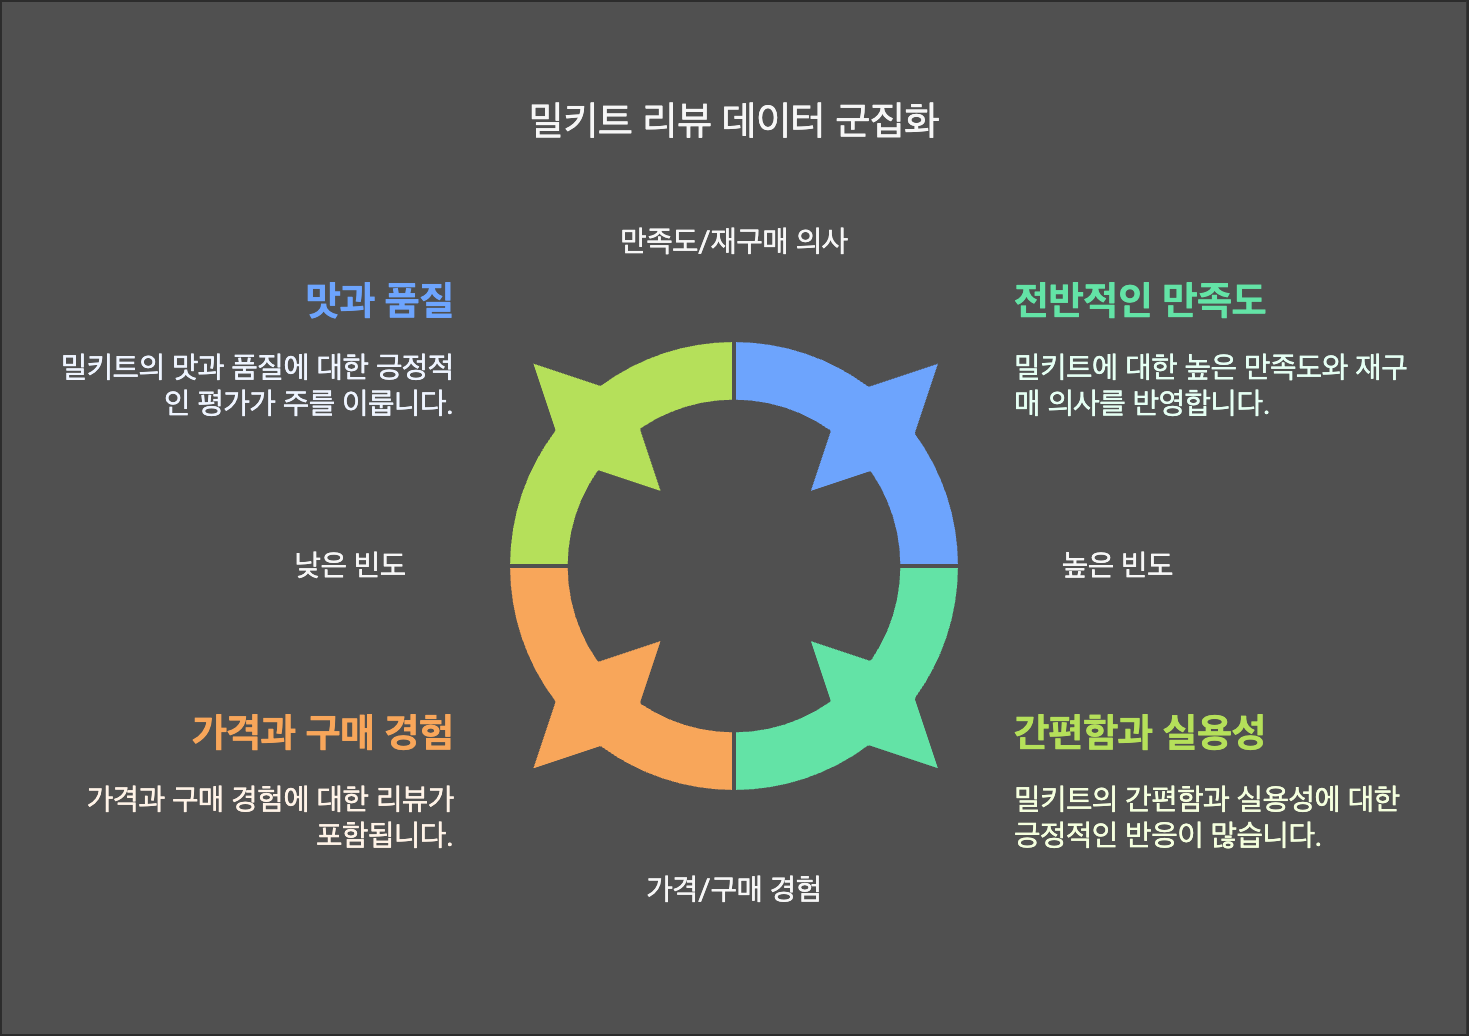